In [2]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 47 (delta 16), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (47/47), done.


In [3]:
ls

Mecab-ko-for-Google-Colab/  sample_data/


In [4]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [5]:
ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [6]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 118kB/s 
     |████████████████████████████████| 92kB 7.5MB/s 
     |████████████████████████████████| 2.7MB 37.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2019-12-17 01:52:33--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.0, 18.205.93.1, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?S

In [7]:
import os, sys 
from google.colab import drive 
drive.mount('/content/mnt') 
nb_path = '/content/notebooks' 
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path) 
sys.path.insert(0, nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/mnt


In [8]:
cd /content/mnt/My Drive/Colab Notebooks

/content/mnt/My Drive/Colab Notebooks


In [0]:
import pandas as pd
train_data_1 = pd.read_csv("train.csv")
train_data_2 = pd.read_csv("model_kb_dacon02_trainset.csv")
test_data = pd.read_csv("public_test.csv")

In [10]:
train_data_1

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0
...,...,...,...,...
295940,336373,2018-12,XXX 고객님!열심히 달려왔던 2018년도 어느 새 뒤안길로 지나쳐가고 벅찬 설렘으...,0
295941,336375,2018-12,XXX고객님실버웰빙신탁이 만기도래 예정입니다.XXX남양주지점,0
295942,336376,2018-12,한해동안 XXX은행과 함께 해주셔서 정말 감사드립니다 2019년 기해년을 맞이하며 ...,0
295943,336377,2018-12,1228(금)예금및 적금 만기입니다.예금은 시간내서 내점하시고 적금은 1년 자동연장...,0


In [11]:
train_data_2

,Unnamed: 0,id,year_month,text,smishing,len,clear_text,len2,clear_text2
0,0,10,2017-01,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...,1,917,(광고)Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다.당행상품의 자...,878,광고Ba고객님들 뒤엔 언제나 새로운 마음가짐으로 새롭게 준비합니다당행상품의 자격기준...
1,1,23,2017-01,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,0,749,시장동향(0130 마감 기준)-KOSPI: 2083.59pt(0.81%)126 마감...,743,시장동향0130 마감 기준KOSPI 208359pt081126 마감 기준 KOSPI...
2,2,26,2017-01,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...,1,399,(광고)추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영...,363,광고추가 품 특판 안내문 지점에서 취급하고 있는 여신 드림론과 달리 여신영업부...
3,3,36,2017-01,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...,1,941,(광고)신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주...,914,광고신용관리 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가가 대신해주지 ...
4,4,45,2017-01,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,1,937,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...,904,광고안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA 수신...
...,...,...,...,...,...,...,...,...,...
37401,37401,336362,2018-12,(광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...,1,1034,(광고)금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내고 있...,1013,광고금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 이자를 내고 있는 분2월...
37402,37402,336366,2018-12,(광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...,1,911,(광고)나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부득이하...,893,광고나의 한도금리를 알아보자금전을 요구하는건 사기입니다 유의하세요1부득이하게 높은 ...
37403,37403,336369,2018-12,(광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...,1,474,(광고) 항상 (국민)은행을 이용해주셔서 감사합니다. 2018년 12월 신상품이 출...,444,광고 항상 국민은행을 이용해주셔서 감사합니다 2018년 12월 신상품이 출시되여서 ...
37404,37404,336370,2018-12,(광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...,1,826,(광고)가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완...,814,광고가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준이 완화되...


In [12]:
test_data

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...
...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...


In [0]:
test_data_text = list(test_data['text'])

test_clear_text = []

for i in range(len(test_data_text)):
  test_clear_text.append(test_data_text[i].replace('XXX', ''))
test_data['clear_text'] = test_clear_text

In [14]:
import re

test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', text)
  test_clear_text2.append(temp)
test_data['clear_text2'] = test_clear_text2
test_data

,id,year_month,text,clear_text,clear_text2
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...


In [15]:
test_data

,id,year_month,text,clear_text,clear_text2
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...,고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난주 글...,고객님 안녕하세요 새롭게 시작하는 한 주 행복 가득하시길 기원합니다 지난주 글로벌 ...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...,긴급 안내 은행 가락동 지점 - 헬리오 기본 대출이자를 조합에서 납부...,긴급 안내 은행 가락동 지점 헬리오 기본 대출이자를 조합에서 납부했...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같든데 ...,고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다엊그제 새해가 시작된거같든데 벌...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...,고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다. 기...,고객님찾아온 행운을 잡으셨나요 못잡으셨다면 이번에 다시 잡으시길 기원합니다 기쁜날...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다. 고객님의 소중...,고객님새해 복 많이 받으세요 은행 코스트코 퇴직연금 담당자입니다 고객님의 소중한...
...,...,...,...,...,...
1621,341621,2019-04,(광고)XXX 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동...,(광고) 고객님안녕하십니까!!고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점...,광고 고객님안녕하십니까고객님의 소중한 업무처리를 도와드린 kb창원중앙동 지점 계장...
1622,341622,2019-04,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...,고객님 항상 저희 지점을 거래해 주셔서 감사합니다 본점 서비스 설문 전화 받으시면...
1623,341623,2019-04,XXX 고객님 저희 XXX은행 XXX지점을 이용해주셔서 감사드립니다 이번주도 더 ...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...,고객님 저희 은행 지점을 이용해주셔서 감사드립니다 이번주도 더 없이 즐겁고 행복...
1624,341624,2019-04,(광고)알림 신청하면 매일 현금 100만원! XXX부동산 리브온지금 XXX부동산 리...,(광고)알림 신청하면 매일 현금 100만원! 부동산 리브온지금 부동산 리브온 App...,광고알림 신청하면 매일 현금 100만원 부동산 리브온지금 부동산 리브온 App에서 ...


In [16]:
from konlpy.tag import Okt
from konlpy.tag import Mecab
okt = Okt()
mecab = Mecab()

/content/notebooks/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [0]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [47]:
from tqdm import tqdm
X_train = []
for i in tqdm(range(len(train_data_2['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(train_data_2['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)

100%|██████████| 37406/37406 [30:50<00:00, 16.94it/s]


In [48]:
X_test = []
for i in tqdm(range(len(test_data['clear_text2']))):
  temp_X = []
  temp_X = okt.morphs(test_data['clear_text2'].iloc[i], stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)

100%|██████████| 1626/1626 [00:37<00:00, 43.00it/s]


In [49]:
print(X_train[:3])

[['광고', 'Ba', '고객', '님', '들다', '뒤', '엔', '언제나', '새롭다', '마음가짐', '새롭다', '준비', '당', '행', '상품', '자격', '기준', '심사', '기준', '완화', '되어다', '상품', '대해', '간단하다', '상품', '정보', '전달', '드리다', '수신', '을', '희망', '않다', '경우', '에는', '거부', '라는', '답장', '을', '주시', '면', 'KISA', '수신', '거부', '목록', '등록', '을', '시키다', '두', '번', '다시', '발송', '되다', '않다', '조치', '취', '해드리다', '신청', '방법', '터치', '문자', '로', '상담', '또는', '00시', '00분', '상담', '이라고', '답장', '을', '보내다', '전화', '주시', '면', '친절하다', '안전하다', '상담', '도움', '드리다', '카카오', '톡', '상담', '서비스', '시행', '중', 'citibankloan', '친구', '추가', '후', '상담', '신청', '이렇다', '분', '께', '권', '해드리다', '1', '시중', '은행권', '에서', '기존', '한도', '모두', '사용', '중', '이신', '분', '2', '기', '대출', '원리금', '균등', '방식', '인하다', '월', '불입', '금액', '부담스럽다', '분', '3', '총', '채무', '금액', '작다', '채', '무겁다', '많다', '관리', '안', '되다', '고객', '님', '들다', '말씀드리다', '높다', '금리', '때문', '힘들다', '느끼다', '때', '대출', '필요하다', '때', '언제나', '고객', '님', '들다', '뒤', '에서', '든든하다', '파트너', '로서', '드리다', '당', '행', '상품', '특징', '1', '당', '행', '거래', '없다', '진행', '가능', '2', 

In [50]:
print(X_test[:3])

[['고객', '님', '안녕하다', '새롭다', '시작', '주', '행복', '가득하다', '기원', '지난주', '글로벌', '증시', '파월', '밉다', '연', '준', '의장', '통화정책', '대해', '완화', '적', '인', '태도', '변화', '보이다', '것', '주초', '투자', '심리', '개선', '이어지다', '크다', '폭', '상승', '마감', '더불다', '밉다', '중', '차관', '급', '무역', '협상', '순', '조', '롭', '게', '진행', '되다', '점도', '긍정', '적', '이다', '원', '달러', '환율', '주간', '75원', '하락', '가운데', '외국인', '투자자', '국내', '증시', '순', '매수', '규모', '8천억', '을', '상회', '수급', '개선', '되다', '점도', '주목', '해보다', '필요', '있다', '금주', '시장', '미국', '금융', '주', '실적', '발표', '시작', '본격', '적', '인', '실적', '시즌', '진입', '되다', '지난주', '애플', '삼성', '전자', '등', '주요', '기업', '1분', '기', '실적', '전망', '하향', '조정', '있다', '점', '을', '참고', '다', '면', '올해', '글로벌', '성장', '둔화', '기', '조속', '에서', '기업', '순', '익', '감소', '추이', '관심', '있다', '살펴보다', '필요', '있다', '보이다', '주', '후반', '에는', '브렉', '시트', '영국', '하원', '표결', '예정', '되어다', '있다', '추워지다', '날씨', '건강', '유의', '좋다', '한주', '되다', '감사하다', '은행', '송도', '센터', '올리다'], ['긴급', '안내', '은행', '가락동', '지점', '헬리', '오', '기본', '대출', '이자', '조합', '에서', '납부', '2018년'

In [0]:
from keras.preprocessing.text import Tokenizer
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [52]:
print(X_train[:3])

[[23, 2940, 11, 14, 223, 1653, 1368, 1254, 486, 3834, 486, 708, 191, 263, 2, 73, 134, 409, 134, 387, 95, 2, 176, 399, 2, 198, 608, 6, 71, 1, 135, 41, 68, 272, 20, 300, 107, 1, 37, 30, 1033, 71, 20, 510, 228, 1, 175, 484, 202, 322, 184, 7, 41, 273, 652, 76, 15, 51, 952, 36, 9, 10, 118, 459, 466, 10, 119, 107, 1, 121, 54, 37, 30, 188, 319, 10, 99, 6, 443, 439, 10, 70, 347, 60, 1319, 302, 48, 96, 10, 15, 620, 18, 110, 114, 76, 17, 205, 126, 22, 160, 13, 226, 65, 60, 392, 18, 19, 125, 5, 90, 104, 61, 108, 201, 683, 62, 403, 18, 21, 246, 86, 62, 245, 433, 1364, 57, 72, 92, 7, 11, 14, 223, 2014, 151, 4, 397, 1424, 1351, 258, 5, 161, 258, 1254, 11, 14, 223, 1653, 22, 553, 1726, 2007, 6, 191, 263, 2, 238, 17, 191, 263, 139, 58, 29, 12, 19, 205, 126, 44, 151, 13, 21, 109, 42, 167, 480, 130, 39, 29, 12, 53, 31, 57, 31, 25, 2, 52, 12, 123, 90, 104, 61, 1, 64, 45, 141, 579, 265, 428, 52, 12, 80, 220, 127, 261, 13, 28, 4, 202, 562, 191, 263, 2, 50, 17, 35, 722, 39, 2, 13, 46, 166, 704, 194, 34, 4, 

In [54]:
print(X_test[:3])

[[11, 14, 148, 486, 555, 276, 467, 784, 601, 1931, 845, 203, 2667, 654, 55, 1177, 2281, 1903, 176, 387, 94, 40, 5058, 2018, 525, 187, 11812, 341, 660, 769, 1707, 493, 706, 112, 267, 1660, 654, 60, 15746, 224, 536, 1460, 830, 1226, 6148, 483, 29, 7, 3606, 1471, 94, 27, 194, 814, 627, 2285, 233, 1179, 753, 1830, 565, 203, 830, 965, 1719, 1, 2488, 974, 769, 7, 3606, 2131, 916, 452, 3, 1894, 346, 419, 26, 276, 423, 1001, 555, 1555, 94, 40, 423, 1731, 1156, 7, 1931, 2273, 1977, 1533, 83, 544, 185, 1276, 125, 423, 900, 2473, 754, 3, 196, 1, 669, 133, 30, 482, 845, 2072, 839, 125, 6359, 22, 185, 830, 8626, 229, 1080, 199, 3, 2041, 452, 3, 525, 276, 2605, 272, 2468, 2455, 1876, 2356, 4287, 976, 95, 3, 2238, 864, 279, 371, 232, 1724, 7, 100, 8, 2855, 242, 89], [4725, 50, 8, 6313, 77, 9485, 880, 551, 5, 64, 7604, 22, 293, 291, 747, 1403, 1036, 1679, 95, 866, 2117, 444, 1403, 173, 320, 1403, 556, 338, 5, 64, 1223, 14, 207, 388, 293, 7, 51, 50, 17, 593, 877, 228, 8, 360, 196, 464, 337, 1147, 658, 

문자의 최대 길이 : 380
문자의 평균 길이 :  207.82516173875848


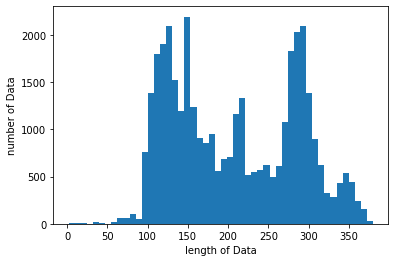

In [55]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train))
print("문자의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

제목의 최대 길이 :  369
제목의 평균 길이 :  87.5350553505535


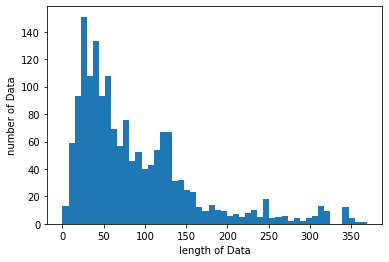

In [56]:
print("제목의 최대 길이 : ", max(len(l) for l in X_test))
print("제목의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [0]:
from keras.utils import np_utils
import numpy as np

y_train = []

for i in range(len(train_data_2['smishing'])):
  if train_data_2['smishing'].iloc[i] == 1:
    y_train.append([0, 1])
  elif train_data_2['smishing'].iloc[i] == 0:
    y_train.append([1, 0])

y_train = np.array(y_train)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [0]:
max_len = 380 # 전체 데이터의 길이를 380로 맞춘다

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [0]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [61]:
model3 = Sequential()
model3.add(Embedding(max_words, 128))
model3.add(LSTM(128))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33665 samples, validate on 3741 samples
Epoch 1/2





33665/33665 [==============================] - 691s 21ms/step - loss: 0.0298 - acc: 0.9942 - val_loss: 0.0973 - val_acc: 0.9824
Epoch 2/2
33665/33665 [==============================] - 685s 20ms/step - loss: 0.0022 - acc: 0.9995 - val_loss: 0.0026 - val_acc: 0.9992


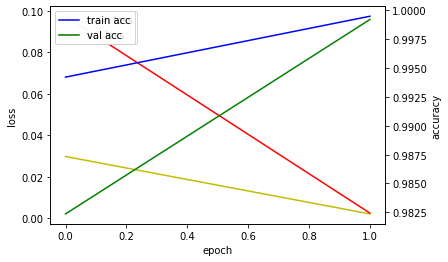

In [62]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history3.history['loss'], 'y', label='train loss')
loss_ax.plot(history3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history3.history['acc'], 'b', label='train acc')
acc_ax.plot(history3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
model3.save("model_kb_dacon_10.h5")

In [64]:
mypredict = model3.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_10.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_10.csv")

,id,smishing
0,340000,0.000026
1,340001,0.005120
2,340002,0.000051
3,340003,0.000044
4,340004,0.000040
...,...,...
1621,341621,0.000027
1622,341622,0.000031
1623,341623,0.000014
1624,341624,0.000152


In [66]:
pd.read_csv("kb_submission_01.csv")

,id,smishing
0,340000,0.000002
1,340001,0.000057
2,340002,0.000001
3,340003,0.000001
4,340004,0.000001
...,...,...
1621,341621,0.000002
1622,341622,0.000002
1623,341623,0.000002
1624,341624,0.000002


In [71]:
pd.read_csv("kb_submission_08_2.csv")

,id,smishing
0,340000,0.000011
1,340001,0.003532
2,340002,0.000007
3,340003,0.000025
4,340004,0.000013
...,...,...
1621,341621,0.000005
1622,341622,0.000022
1623,341623,0.000010
1624,341624,0.000009


In [67]:
model4 = Sequential()
model4.add(Embedding(max_words, 128))
model4.add(LSTM(256))
model4.add(Dense(2, activation='sigmoid'))

model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 1327s 39ms/step - loss: 0.0262 - acc: 0.9942 - val_loss: 0.0091 - val_acc: 0.9973
Epoch 2/2
33665/33665 [==============================] - 1384s 41ms/step - loss: 0.0036 - acc: 0.9990 - val_loss: 0.0107 - val_acc: 0.9973


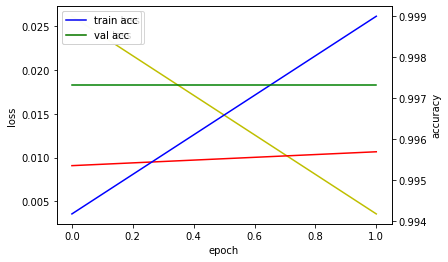

In [68]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history4.history['loss'], 'y', label='train loss')
loss_ax.plot(history4.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history4.history['acc'], 'b', label='train acc')
acc_ax.plot(history4.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [72]:
mypredict = model4.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_10_1.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_10_1.csv")

,id,smishing
0,340000,0.000025
1,340001,0.000130
2,340002,0.000551
3,340003,0.000211
4,340004,0.000029
...,...,...
1621,341621,0.000015
1622,341622,0.000869
1623,341623,0.000206
1624,341624,0.000016


In [0]:
model4.save("model_kb_dacon_10_2.h5")

In [73]:
model5 = Sequential()
model5.add(Embedding(max_words, 100))
model5.add(LSTM(256))
model5.add(Dense(2, activation='sigmoid'))

model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history5 = model5.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/2
33665/33665 [==============================] - 1260s 37ms/step - loss: 0.0474 - acc: 0.9941 - val_loss: 0.0062 - val_acc: 0.9987
Epoch 2/2
33665/33665 [==============================] - 1319s 39ms/step - loss: 0.0017 - acc: 0.9996 - val_loss: 0.0358 - val_acc: 0.9860


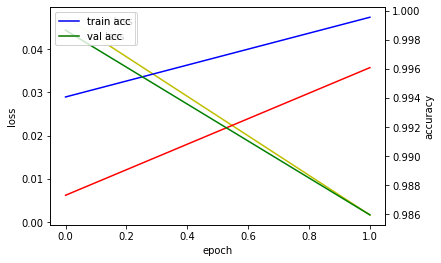

In [79]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history5.history['loss'], 'y', label='train loss')
loss_ax.plot(history5.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history5.history['acc'], 'b', label='train acc')
acc_ax.plot(history5.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [80]:
mypredict = model5.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_10_2_2.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_10_2_2.csv")

,id,smishing
0,340000,0.000012
1,340001,0.766908
2,340002,0.000097
3,340003,0.000011
4,340004,0.000003
...,...,...
1621,341621,0.000018
1622,341622,0.000039
1623,341623,0.000016
1624,341624,0.000138


In [0]:
model5.save("model_kb_dacon_10_2_2.h5")

In [77]:
model6 = Sequential()
model6.add(Embedding(max_words, 100))
model6.add(LSTM(256))
model6.add(Dense(2, activation='sigmoid'))

model6.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history6 = model6.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1)

Train on 33665 samples, validate on 3741 samples
Epoch 1/1
33665/33665 [==============================] - 1276s 38ms/step - loss: 0.0346 - acc: 0.9899 - val_loss: 0.0107 - val_acc: 0.9963


In [78]:
mypredict = model6.predict(X_test)
submission_ids = list(test_data['id'])
my_result = []

for i in range(len(mypredict)):
  my_result.append(mypredict[i][1])

sub_dict = {"id":submission_ids, "smishing":my_result}
submission_df = pd.DataFrame(sub_dict)
submission_df.to_csv("kb_submission_10_3.csv", index=False, encoding='utf-8')
pd.read_csv("kb_submission_10_3.csv")

,id,smishing
0,340000,0.000114
1,340001,0.276143
2,340002,0.000300
3,340003,0.000227
4,340004,0.000092
...,...,...
1621,341621,0.000108
1622,341622,0.000783
1623,341623,0.000530
1624,341624,0.000325
